
# Some results obtained based on the test sample of 1012 galaxies



The quality of the fitted SEDs is calculated making use of the chi2 value of the best model, marginalized over all parameters except the one assigned for the further physical analysis. The final output values of analyzed parameters are calculated as the mean  and standard deviation determined from the PDFs.

The distribution of the chi^2 is shown in histogram below. Mean value of the chi^2 parameter equal to 3.3 and median to 1.7.  Based on the distribution of chi^2 values for the COSMOS sample of 1012 galaxies and after visual verification of all single fits, we decided to restrict our analysis to the modeled SEDs with the  reduced chi^2 value lower than four.
We found 773 galaxies  that fulfill this condition for the chi^2.


In [1]:
import math,string,os,sys
import numpy as np
import matplotlib as mpl
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
from matplotlib import colors
from math import log10
from numpy import linspace
from scipy.optimize import curve_fit
from scipy import pi,sin,cos
import pylab as p
from mpl_toolkits.axes_grid1 import make_axes_locatable


error_treshold=1000000000000000000000000.0
AGNtreshold=0.2
chi2_treshold=4
a=[0,0.25,0.75,1.25,1.75,2.25, 3.25,4.25, 0]
b=[0.25,0.75,1.25,1.75,2.25, 3.25,4.25, 5.75,6.25]

idHELP,chi,redshift,name_ID=[],[],[],[]
SFR,SFRerr,Mstar,Mstarerr,Ldust,Ldusterr,Lfuv,Lfuverr,Av, Averr, Afuv, Afuverr=[],[],[],[],[],[],[],[],[],[],[],[]
fracAGN,fracAGNerr,realAGN=[],[],[]
tau_main,tau_mainerr, age, ageerr, burst_age, burst_ageerr, f_burst, f_bursterr=[],[],[],[],[],[],[],[]
SFR_Kennicutt,logMstar,logSFR, logLdust,logLfuv,AttV,AttFUV,sSFR=[],[],[],[],[],[],[],[]

#for IR photometry verification

bestPACS_green, bestPACS_red, bestPSW, bestPMW, bestPLW, PACS_green, PACS_red, PSW, PMW, PLW, PACS_green_err, PACS_red_err, PSW_err, PMW_err, PLW_err=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
PACS_green_bin,PACS_red_bin, PSW_bin,PMW_bin,PLW_bin=[],[],[],[],[]

#for AGN criteria

IRAC1_zero_mag_VEGA=280.9
IRAC2_zero_mag_VEGA=178.7
IRAC3_zero_mag_VEGA=115.0
IRAC4_zero_mag_VEGA=64.13

IRAC1, IRAC2, IRAC3, IRAC4=[],[],[],[]
IRAC1err, IRAC2err, IRAC3err, IRAC4err=[],[],[],[]
x,y=[],[]
xbin,xbinerr,ybin,ybinerr=[],[],[],[]

x_Donley,y_Donley=[],[]
Stern_AGNs_region,region_outside_Stern_AGNs=[],[]
x_Stern_AGN,y_Stern_AGN,Stern_AGN_frac =[],[],[]
x_outside_Stern_AGN,y_outside_Stern_AGN,outside_Stern_AGN_frac=[],[],[]
x_outside_Stern_no_AGN,y_outside_Stern_no_AGN,outside_Stern_no_AGN_frac=[],[],[]

Donley_AGNs_region,region_outside_Donley_AGNs=[],[]
x_Donley_AGN,y_Donley_AGN,Donley_AGN_frac =[],[],[]
x_outside_Donley_AGN,y_outside_Donley_AGN,outside_Donley_AGN_frac=[],[],[]
x_outside_Donley_no_AGN,y_outside_Donley_no_AGN,outside_Donley_no_AGN_frac=[],[],[]

Lacy_AGNs_region,region_outside_Lacy_AGNs=[],[]
x_Lacy_AGN,y_Lacy_AGN,Lacy_AGN_frac =[],[],[]
x_outside_Lacy_AGN,y_outside_Lacy_AGN,outside_Lacy_AGN_frac=[],[],[]
x_outside_Lacy_no_AGN,y_outside_Lacy_no_AGN,outside_Lacy_no_AGN_frac=[],[],[]


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['xtick.minor.size'] = 6
plt.rcParams['ytick.major.size'] = 15
plt.rcParams['ytick.minor.size'] = 6
plt.rcParams['ytick.minor.size'] = 6
plt.rc('legend',**{'fontsize':20})
plt.rc("font", size=20)
mpl.rc('lines', linewidth=6, color='gold', linestyle="-")

bbox_props = dict(boxstyle="round", fc="white", ec="blue", alpha=0.9, lw=1)
############# READ THE FILE  ##################
result_file=open("results_0.5")
for line in result_file:
    if line.startswith('#'):
        continue
    else:
        line = line.strip()
        fields = line.split()
        idHELP.append(fields[0])
        chi.append(float(fields[25]))
        redshift.append(float(fields[1]))
        Mstar.append(float(fields[2]))
        Mstarerr.append(float(fields[3]))
        SFR.append(float(fields[4]))
        SFRerr.append(float(fields[5]))
        Ldust.append(float(fields[6]))
        Ldusterr.append(float(fields[7]))
        fracAGN.append(float(fields[10]))
        fracAGNerr.append(float(fields[11]))

        IRAC1.append(float(fields[134]))
        IRAC1err.append(float(fields[135]))
        IRAC2.append(float(fields[136]))
        IRAC2err.append(float(fields[137]))
        IRAC3.append(float(fields[138]))
        IRAC3err.append(float(fields[139]))
        IRAC4.append(float(fields[140]))
        IRAC4err.append(float(fields[141]))

        bestPACS_green.append(float(fields[105]))
        bestPACS_red.append(float(fields[106]))
        bestPSW.append(float(fields[107]))
        bestPMW.append(float(fields[108]))
        bestPLW.append(float(fields[109]))

        PACS_green.append(float(fields[144]))
        PACS_green_err.append(float(fields[145]))
        PACS_red.append(float(fields[146]))
        PACS_green_err.append(float(fields[147]))
        PSW.append(float(fields[148]))
        PSW_err.append(float(fields[149]))
        PMW.append(float(fields[150]))
        PMW_err.append(float(fields[151]))
        PLW.append(float(fields[152]))
        PLW_err.append(float(fields[153]))



Distribution of the main physcial parameters:

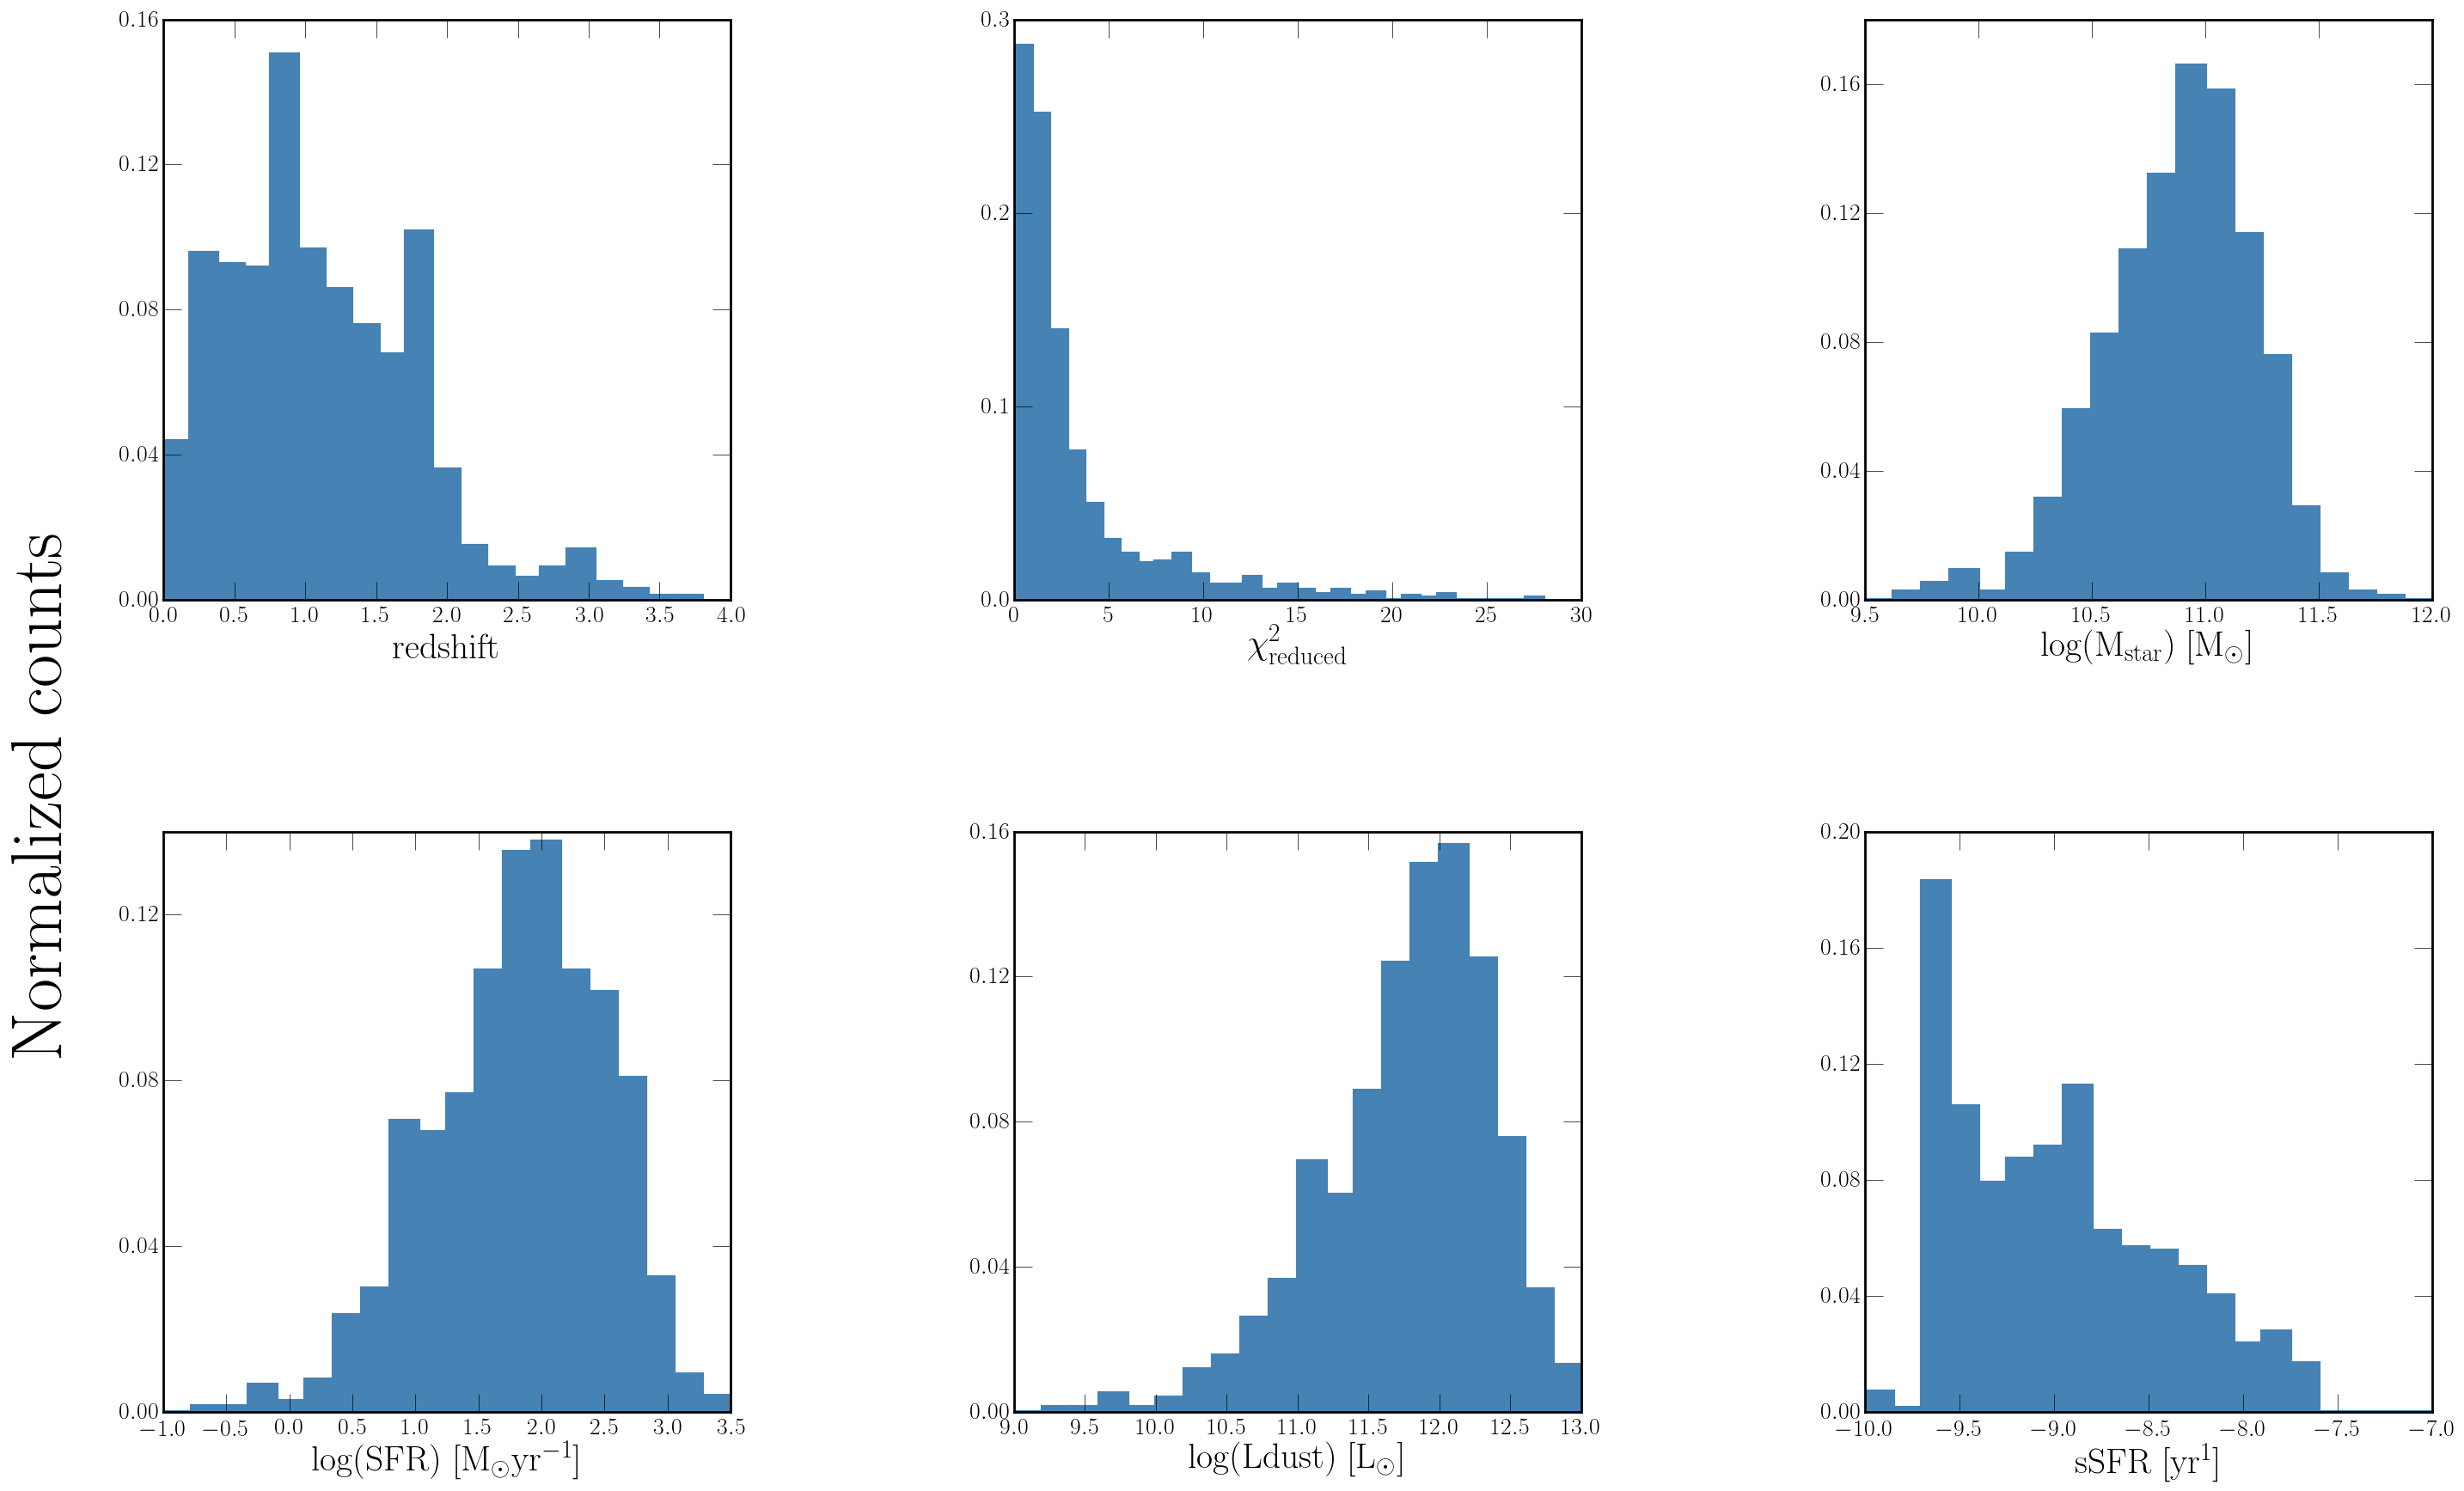

In [2]:
#################################################################################################
#################################################################################################
# Normalized histograms redshift chi2 Mstar SFR Ldust sSFR for the team
#################################################################################################
#################################################################################################	

f, ((plt1, plt2, plt3), (plt4,plt5,plt6)) = plt.subplots(2,3, figsize=(30,20))
f.text(0.01, 0.5, r'$\rm Normalized\mbox{ }counts$', va='center', rotation='vertical',fontsize=60)

plt.subplots_adjust(left=0.07, bottom=0.14, right=0.95, top=0.95, wspace=0.5, hspace=0.4)


del logMstar[:]
del xbinerr[:]
del logSFR[:]
del ybinerr[:]


for i in range(0,len(chi)):	
    if chi[i] <= chi2_treshold and  SFR[i]>0 and Ldust[i]>0:
        logMstar.append(log10(Mstar[i]))
        logSFR.append(log10(SFR[i]))
        logLdust.append(log10(Ldust[i]/(3.846*pow(10,26))))
        sSFR.append(log10(SFR[i])-log10(Mstar[i]))


density, bins = np.histogram(redshift,  bins=20, normed=True, density=True,  range=(0,3.8))
unity_density = density / density.sum()
widths = bins[:-1] - bins[1:]
plt1.bar(bins[1:], unity_density, width = widths, color="steelblue", edgecolor="steelblue", linewidth=3 )
plt1.yaxis.set_major_locator(plt.MultipleLocator(0.04))
plt1.set_xlabel(r"$\rm redshift$", fontsize=30)

density, bins = np.histogram(chi,  bins=30, normed=True, density=True,  range=(0,28))
unity_density = density / density.sum()
widths = bins[:-1] - bins[1:]
plt2.bar(bins[1:], unity_density, width = widths, color="steelblue", edgecolor="steelblue", linewidth=3 )
plt2.yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt2.set_xlabel(r"$\rm \chi^2_{reduced}$", fontsize=30)

density, bins = np.histogram(logMstar,  bins=20, normed=True, density=True,  range=(9.5,12))
unity_density = density / density.sum()
widths = bins[:-1] - bins[1:]
plt3.bar(bins[1:], unity_density, width = widths, color="steelblue", edgecolor="steelblue", linewidth=3 )
plt3.yaxis.set_major_locator(plt.MultipleLocator(0.04))
plt3.set_xlabel(r"$\rm log(M_{star})\mbox{ }[M_{\odot}] $", fontsize=30)


density, bins = np.histogram(logSFR,  bins=20, normed=True, density=True,  range=(-1,3.5))
unity_density = density / density.sum()
widths = bins[:-1] - bins[1:]
plt4.bar(bins[1:], unity_density, width = widths, color="steelblue", edgecolor="steelblue", linewidth=3 )
plt4.yaxis.set_major_locator(plt.MultipleLocator(0.04))
plt4.set_xlabel(r"$\rm log(SFR)\mbox{ }[M_{\odot}yr^{-1}] $", fontsize=30)

density, bins = np.histogram(logLdust,  bins=20, normed=True, density=True,  range=(9,13))
unity_density = density / density.sum()
widths = bins[:-1] - bins[1:]
plt5.bar(bins[1:], unity_density, width = widths, color="steelblue", edgecolor="steelblue", linewidth=3 )
plt5.yaxis.set_major_locator(plt.MultipleLocator(0.04))
plt5.set_xlabel(r"$\rm log(Ldust)\mbox{ }[L_{\odot}] $", fontsize=30)


density, bins = np.histogram(sSFR,  bins=20, normed=True, density=True,  range=(-10,-7))
unity_density = density / density.sum()
widths = bins[:-1] - bins[1:]
plt6.bar(bins[1:], unity_density, width = widths, color="steelblue", edgecolor="steelblue", linewidth=3 )
plt6.yaxis.set_major_locator(plt.MultipleLocator(0.04))
plt6.set_xlabel(r"$\rm sSFR\mbox{ }[yr^{1}]$", fontsize=30)

plt.show()
#plt.savefig('HISTO_for_the_Team.pdf')
#plt.close()   


And their dependence on redshift:


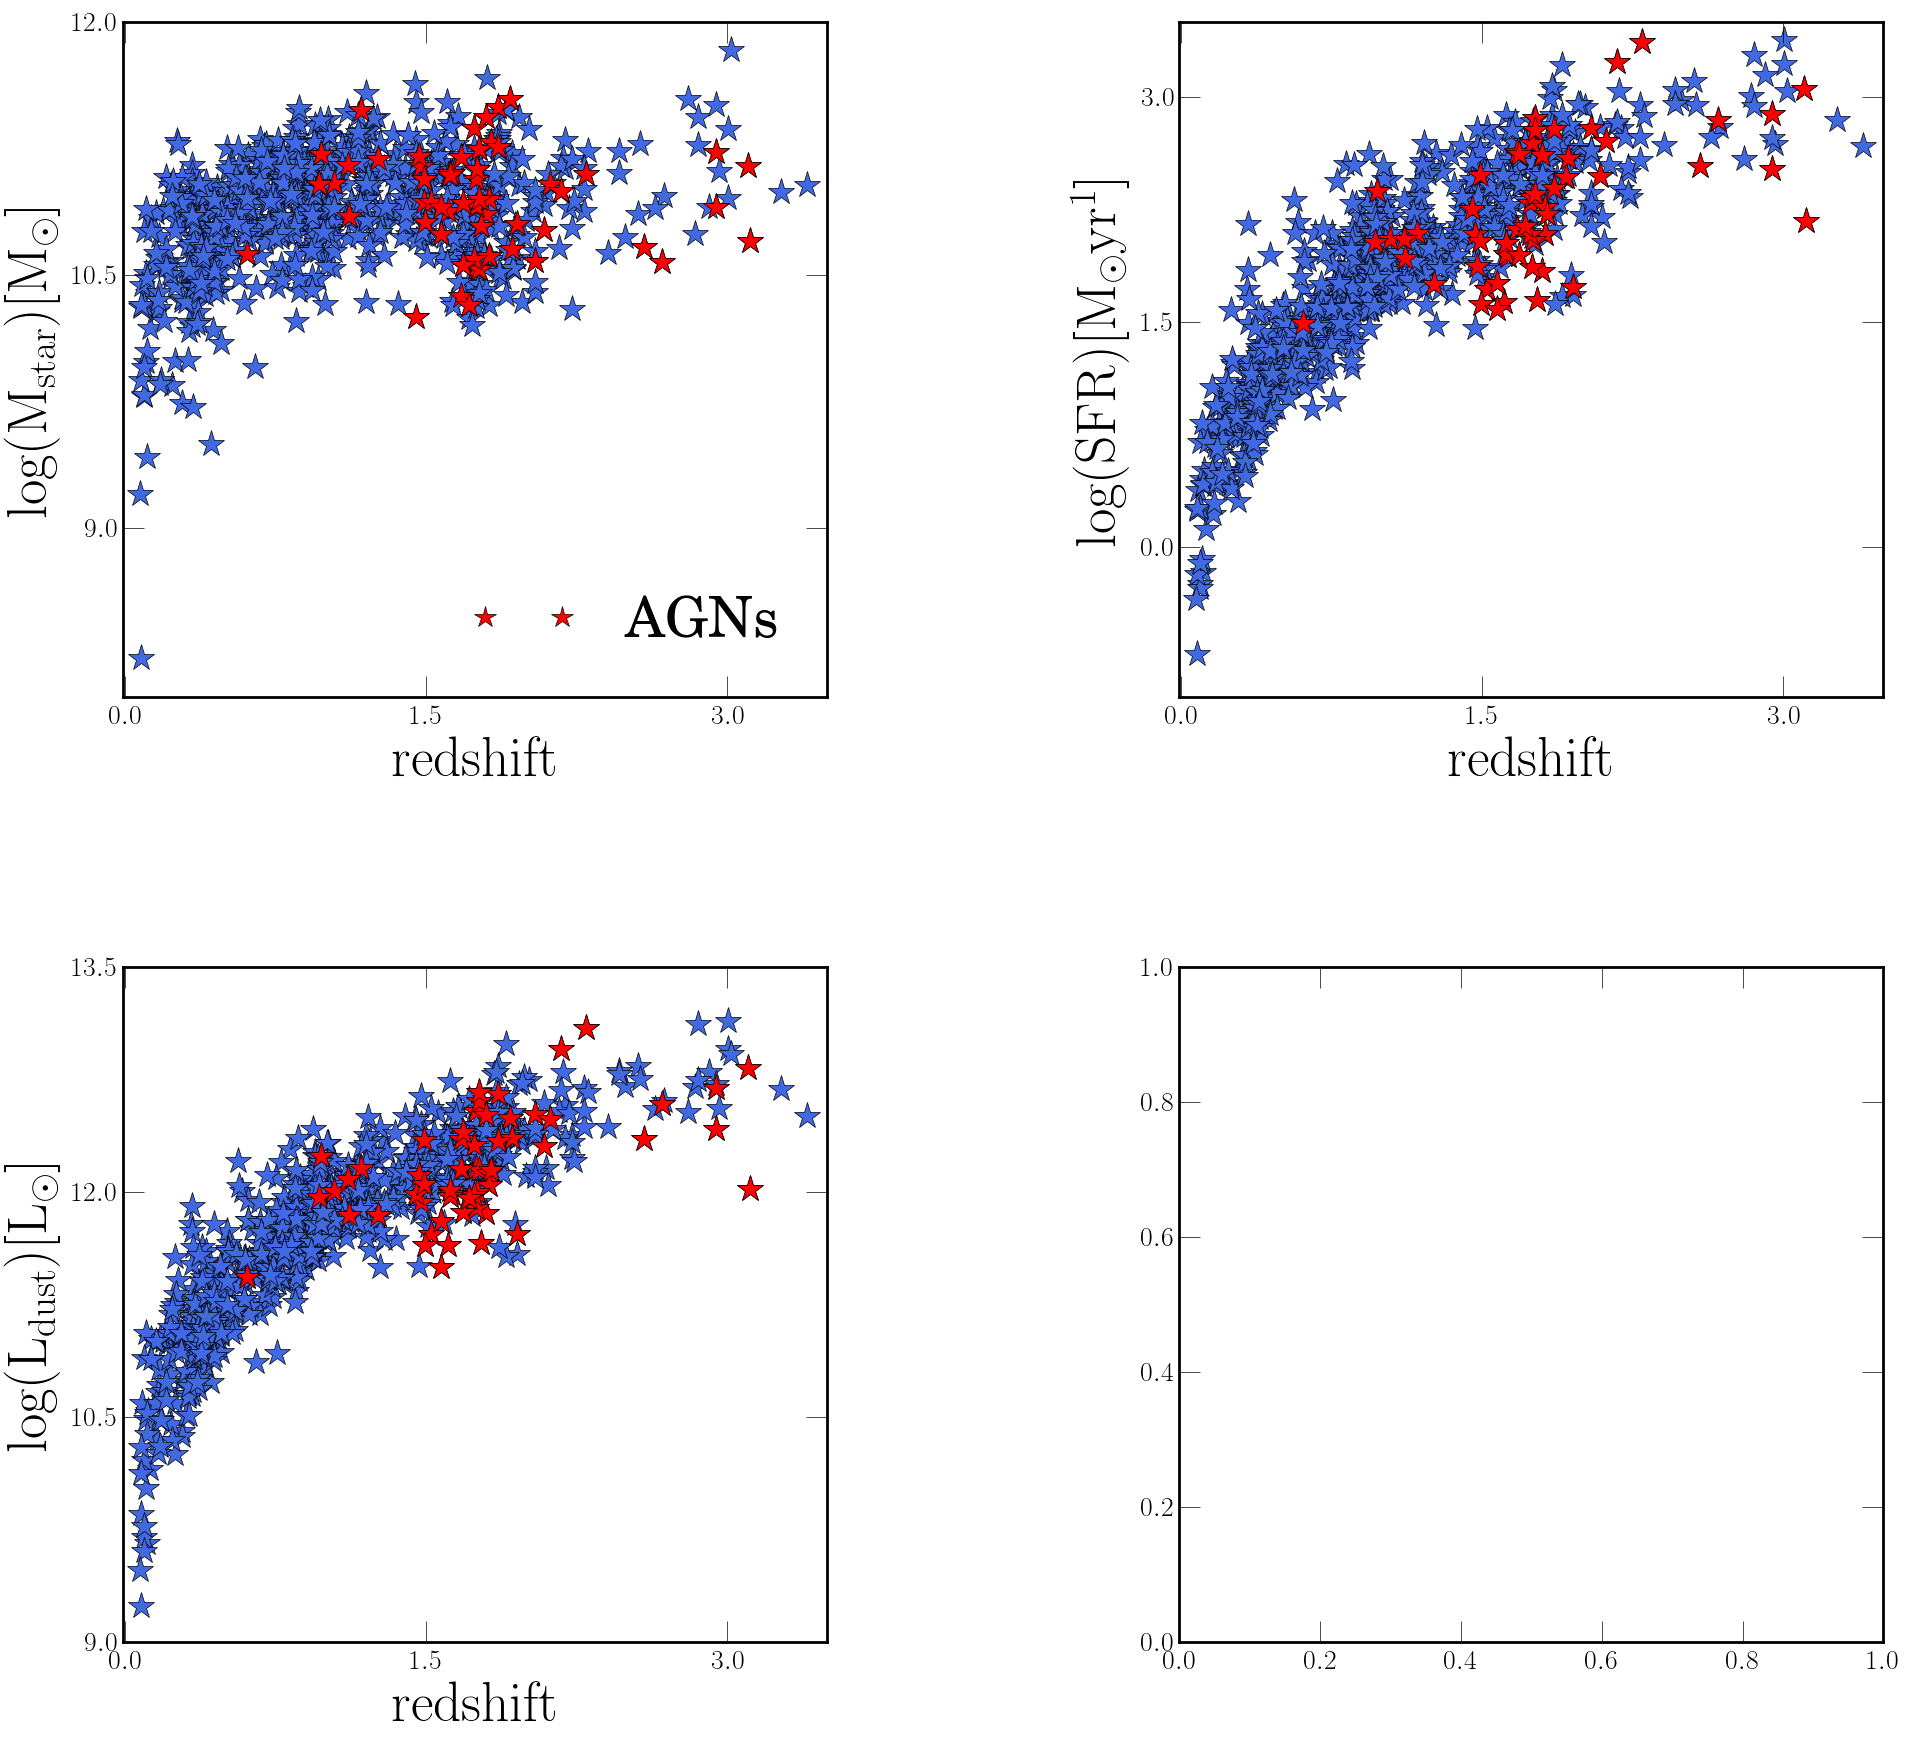

In [9]:
################################################################################################
#################################################################################################
#  Mstar SFR Ldust Lfuv Av Afuv AGNfrac vs redshift
#################################################################################################
#################################################################################################	

f, ((plt1, plt2), (plt3,plt4)) = plt.subplots(2,2, figsize=(20,20))
plt.subplots_adjust(left=0.07, bottom=0.14, right=0.95, top=0.95, wspace=0.5, hspace=0.4)

del xbin[:]
del ybin[:]

for i in range(0,len(chi)):	
    if chi[i] <= chi2_treshold and SFR[i]>0:
        xbin.append(redshift[i])
        ybin.append(log10(Mstar[i]))
plt1.plot(xbin,ybin,'-*',c='royalblue',markersize=20, linestyle='')

del xbin[:]
del ybin[:]

for i in range(0,len(chi)):	
    if chi[i] <= chi2_treshold and SFR[i]>0 and (fracAGN[i]-fracAGNerr[i])>=AGNtreshold:
        xbin.append(redshift[i])
        ybin.append(log10(Mstar[i]))
plt1.plot(xbin,ybin,'-*',c='red',markersize=20, linestyle='', label='AGNs')

plt1.yaxis.set_major_locator(plt.MultipleLocator(1.5))
plt1.xaxis.set_major_locator(plt.MultipleLocator(1.5))
plt1.set_xlabel(r"$\rm redshift$", fontsize=40)
plt1.set_ylabel(r"$\rm log(M_{star}) [M_{\odot}]$", fontsize=40)
plt1.set_ylim((8,12))
plt1.set_xlim((-0.01,3.5))
plt1.legend(loc='best',frameon=False, fontsize =40,markerscale=0.8)


del xbin[:]
del ybin[:]

for i in range(0,len(chi)):	
    if chi[i] <= chi2_treshold and SFR[i]>0:
        xbin.append(redshift[i])
        ybin.append(log10(SFR[i]))
plt2.plot(xbin,ybin,'-*',c='royalblue',markersize=20, linestyle='')

del xbin[:]
del ybin[:]

for i in range(0,len(chi)):	
    if chi[i] <= chi2_treshold and SFR[i]>0 and (fracAGN[i]-fracAGNerr[i])>=AGNtreshold:
        xbin.append(redshift[i])
        ybin.append(log10(SFR[i]))
plt2.plot(xbin,ybin,'-*',c='red',markersize=20, linestyle='', label='AGNs')

plt2.yaxis.set_major_locator(plt.MultipleLocator(1.5))
plt2.xaxis.set_major_locator(plt.MultipleLocator(1.5))
plt2.set_xlabel(r"$\rm redshift$", fontsize=40)
plt2.set_ylabel(r"$\rm log(SFR) [M_{\odot}yr^{1}]$", fontsize=40)
plt2.set_ylim((-1,3.5))
plt2.set_xlim((-0.01,3.5))


del xbin[:]
del ybin[:]

for i in range(0,len(chi)):	
    if chi[i] <= chi2_treshold and SFR[i]>0:
        xbin.append(redshift[i])
        ybin.append(log10(Ldust[i]/(3.846*pow(10,26))))
plt3.plot(xbin,ybin,'-*',c='royalblue',markersize=20, linestyle='')

del xbin[:]
del ybin[:]

for i in range(0,len(chi)):	
    if chi[i] <= chi2_treshold and SFR[i]>0 and (fracAGN[i]-fracAGNerr[i])>=AGNtreshold:
        xbin.append(redshift[i])
        ybin.append(log10(Ldust[i]/(3.846*pow(10,26))))
plt3.plot(xbin,ybin,'-*',c='red',markersize=20, linestyle='', label='AGNs')

plt3.yaxis.set_major_locator(plt.MultipleLocator(1.5))
plt3.xaxis.set_major_locator(plt.MultipleLocator(1.5))
plt3.set_xlabel(r"$\rm redshift$", fontsize=40)
plt3.set_ylabel(r"$\rm log(L_{dust}) [L_{\odot}]$", fontsize=40)
plt3.set_ylim((9,13.5))
plt3.set_xlim((-0.01,3.5))


plt.show()
#plt.savefig('redshift_dependence.pdf')
plt.close()   





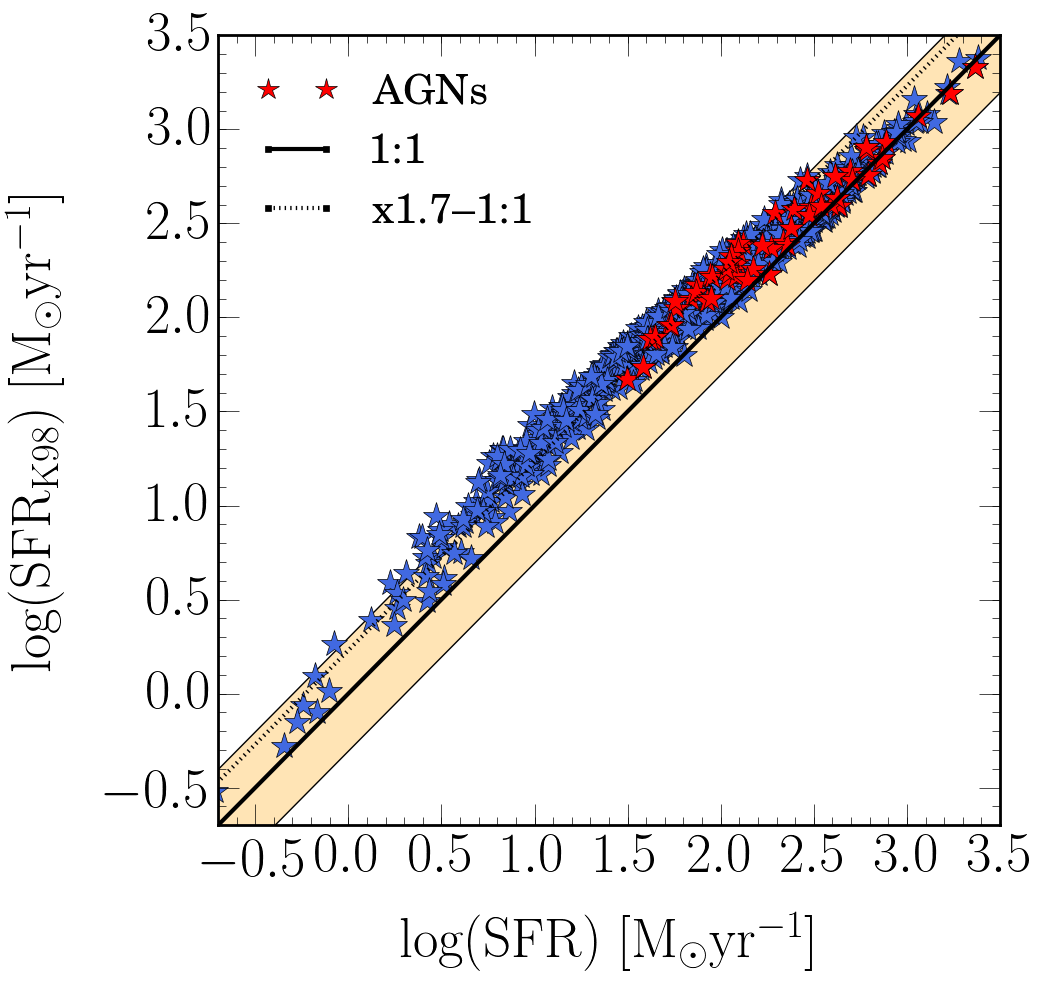

In [4]:
#################################################################################################
#################################################################################################
# SFR vs sfr kENNICUTT 1998
#################################################################################################
#################################################################################################	
fig, ax = plt.subplots(figsize=(10,10))
plt.subplots_adjust(left=0.168, bottom=0.16, right=0.95, top=0.95, wspace=None, hspace=None)

del xbin[:]
del SFR_Kennicutt[:]

for i in range(0,len(chi)):
    if chi[i] <= chi2_treshold and SFR[i]>0:
        xbin.append(log10(SFR[i]))
        SFR_Kennicutt.append(log10(4.5*float(pow(10,-44)*pow(10,7)*Ldust[i])))
ax.plot(xbin,SFR_Kennicutt,'-*',c='royalblue',markersize=20, linestyle='')

del xbin[:]
del SFR_Kennicutt[:]

for i in range(0,len(chi)):	
    if chi[i] <= chi2_treshold and SFR[i]>0 and (fracAGN[i]-fracAGNerr[i])>=AGNtreshold:
        xbin.append(log10(SFR[i]))
        SFR_Kennicutt.append(log10(4.5*float(pow(10,-44)*pow(10,7)*Ldust[i])))
ax.plot(xbin,SFR_Kennicutt,'-*',c='red',markersize=20, linestyle='', label='AGNs')

x = np.linspace(-1,3.6,2)
y = x
ax.plot(x,y,'-s',c='black',linewidth=3, linestyle='-',label='1:1')

x = np.linspace(-1,3.6,2)
y = x+0.230448921
ax.plot(x,y,'-s',c='black',linewidth=3, linestyle=':',label='x1.7--1:1')


x = np.linspace(-1,3.6,2)
y1 = x-0.301029996
y2 = x+0.301029996
plt.fill_between(x, y2, y1, facecolor='moccasin')


plt.ylim((-0.7,3.5))
plt.xlim((-0.7,3.5))
plt.locator_params(nbins=10)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.minorticks_on()
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25
plt.xlabel(r'$\rm log(SFR)\mbox{ }[M_{\odot}yr^{-1}]$', fontsize=40)
plt.ylabel(r'$\rm log(SFR_{K98})\mbox{ }[M_{\odot}yr^{-1}]$', fontsize=40)
plt.legend(loc='upper left',frameon=False, fontsize =30,markerscale=0.8)
plt.show()
#plt.savefig('SFRvsSFRKennicutt.pdf')
plt.close()   


